<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
cd '/content/drive/MyDrive/Churn_ Prediction/'

/content/drive/MyDrive/Churn_ Prediction


In [251]:
pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from fast_ml.model_development import train_valid_test_split
%matplotlib inline

**Load the data**

In [253]:
df = pd.read_excel('datasets/E_Commerce_Dataset.xlsx',sheet_name ='E_Comm')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
302,50303,0,30.0,Computer,3,34.0,E wallet,Female,3.0,4,Fashion,5,Divorced,5,0,19.0,13.0,13.0,11.0,202.66
2526,52527,0,22.0,Mobile Phone,1,12.0,Debit Card,Female,2.0,4,Grocery,3,Married,3,1,19.0,2.0,NaN,12.0,239.66
2433,52434,0,15.0,Phone,1,8.0,Credit Card,Male,3.0,4,Mobile Phone,4,Married,5,0,14.0,0.0,1.0,0.0,148.41
945,50946,0,1.0,Computer,3,13.0,Debit Card,Male,2.0,3,Laptop & Accessory,5,Single,1,0,14.0,1.0,1.0,3.0,148.98
1989,51990,0,4.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,1,Married,4,1,19.0,0.0,1.0,2.0,123.56


In [254]:
category_count = df['Churn'].value_counts()
categories = category_count.index

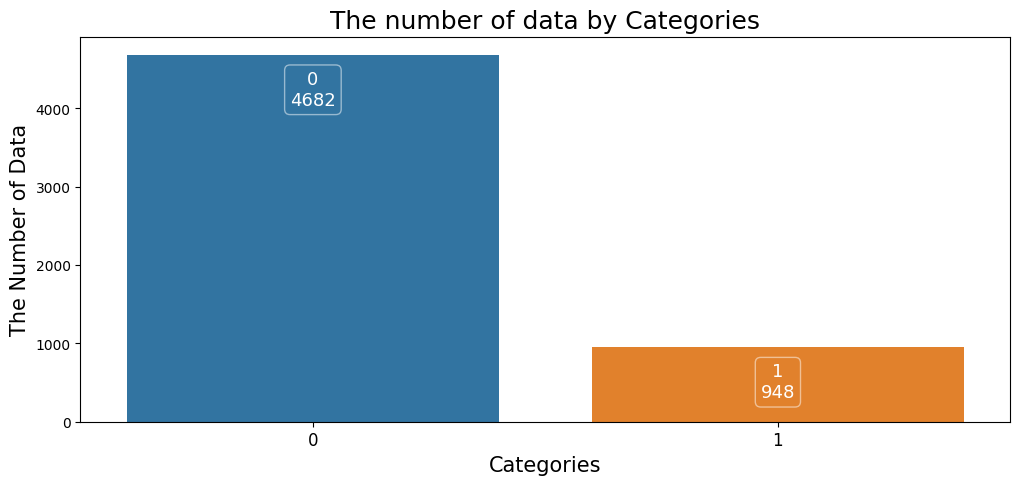

In [255]:

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Data', size= 15)

plt.xticks(size = 12)

plt.title("The number of data by Categories" , size = 18)

plt.show()

**First of all, drop customerID column as it is of no use**

In [256]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [257]:
# df.TotalCharges.values

**Ahh... it is string. Lets convert it to numbers**

**Data Visualization**

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [258]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [259]:
print_unique_col_values(df)

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

**Convert Yes and No to 1 or 0**

In [260]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

**One hot encoding for categorical columns**

In [261]:
df = pd.get_dummies(df)
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [262]:
df.sample(5)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3453,53454,0,8.0,3,17.0,0,3.0,4,3,3,...,0,0,0,0,0,1,0,1,0,0
5103,55104,0,20.0,2,8.0,0,3.0,4,5,8,...,0,0,0,0,0,1,0,0,0,1
2818,52819,1,1.0,3,16.0,1,3.0,5,5,9,...,0,0,0,1,0,0,0,0,0,1
1269,51270,0,5.0,1,11.0,1,2.0,4,1,9,...,0,0,0,1,0,0,0,0,0,1
2745,52746,0,11.0,2,7.0,1,NaN,3,4,1,...,1,0,0,0,1,0,0,0,1,0


In [263]:
nan_count = df.isna().sum().sum()
print(nan_count )

1856


In [264]:
df.fillna(df.median(), inplace=True)

In [265]:
cols_to_scale = ['CashbackAmount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [266]:
#Undersampling to handle class imbalance
def Under_Sampling(df):
  df_pos = df[df['Churn'] == 1]
  df_neg = df[df['Churn'] == 0]
  msk = np.random.rand(len(df_neg)) < 0.25
  print (len(msk))
  df_neg_sample = df_neg[msk]
  df_sample_data = pd.concat([df_pos,df_neg_sample])
  df_sample_data = df_sample_data.sample(frac=1).reset_index(drop=True)
  return df_sample_data


In [267]:
df = Under_Sampling(df)  

4682


**Train test split**

In [268]:
drop_cols = ['CustomerID']
# y = df['Churn']

df = df.drop(drop_cols,axis=1)
# y = df['Churn']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)



X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Churn', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1689, 33)
(1689,)
(211, 33)
(211,)
(212, 33)
(212,)


(None, None)

In [269]:
X_train.shape

(1689, 33)

In [270]:
X_test.shape

(212, 33)

In [271]:
len(X_train.columns)

33

**Build a model (ANN) in tensorflow/keras**

In [272]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(33,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
53/53 [==============================] - 2s 7ms/step - loss: 0.6524 - accuracy: 0.6655 - val_loss: 0.5720 - val_accuracy: 0.7441
Epoch 2/150
53/53 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.7194 - val_loss: 0.5233 - val_accuracy: 0.7441
Epoch 3/150
53/53 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7484 - val_loss: 0.5132 - val_accuracy: 0.7773
Epoch 4/150
53/53 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7649 - val_loss: 0.4871 - val_accuracy: 0.7820
Epoch 5/150
53/53 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.7857 - val_loss: 0.4828 - val_accuracy: 0.7867
Epoch 6/150
53/53 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.7910 - val_loss: 0.4752 - val_accuracy: 0.7725
Epoch 7/150
53/53 [==============================] - 0s 4ms/step - loss: 0.4293 - accuracy: 0.8052 - val_loss: 0.4580 - val_accuracy: 0.7820
Epoch 8/150
5

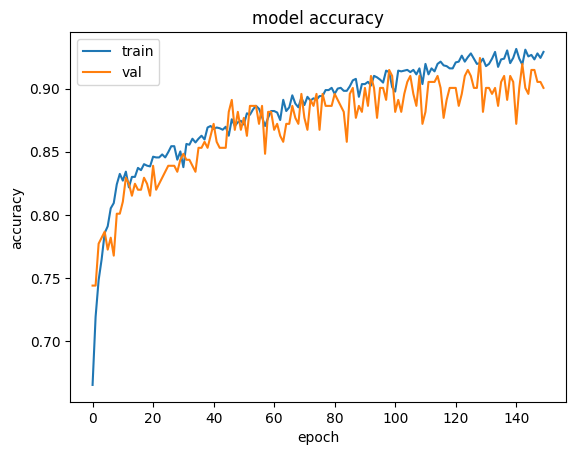

In [273]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

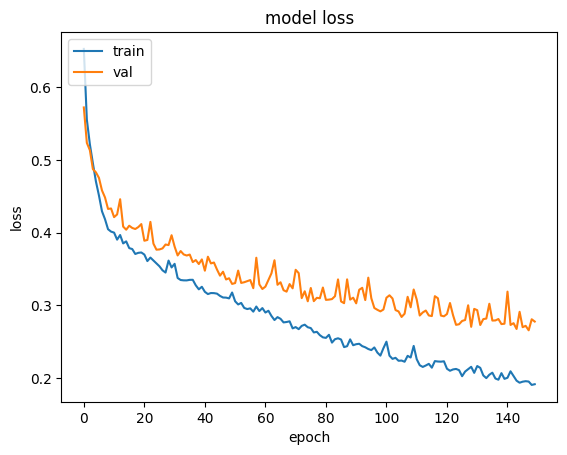

In [274]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [275]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8868


[0.30443504452705383, 0.8867924809455872]

In [276]:
yp = model.predict(X_test)
yp[:5]

7/7 [==============================] - 0s 2ms/step


array([[0.19887353],
       [0.03102402],
       [0.10622118],
       [0.00514426],
       [0.9998815 ]], dtype=float32)

In [277]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [278]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       117
           1       0.88      0.86      0.87        95

    accuracy                           0.89       212
   macro avg       0.89      0.88      0.89       212
weighted avg       0.89      0.89      0.89       212



Text(95.72222222222221, 0.5, 'Truth')

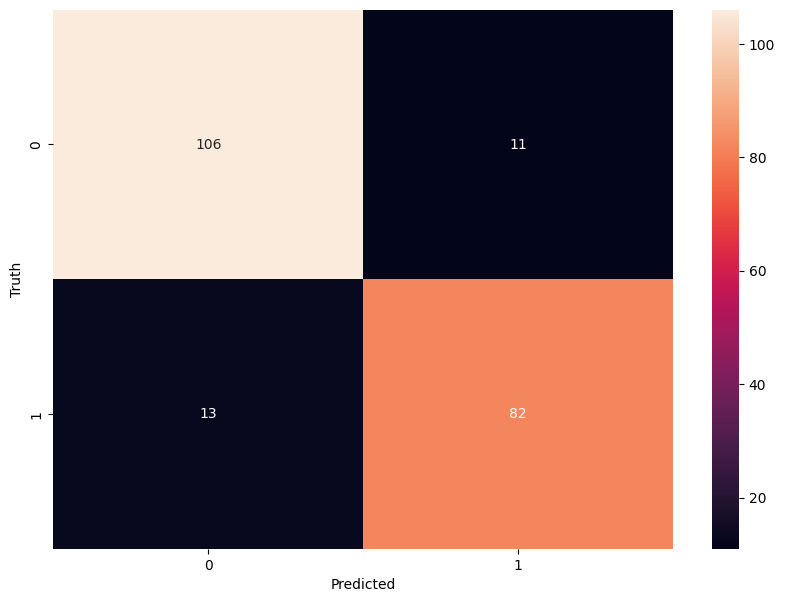

In [279]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [280]:
y_test.shape

(212,)